# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())
#import chromedriver_autoinstaller chromedriver_autoinstaller.install()
executable_path = {'executable_path': ChromeDriverManager().install()}

/var/folders/l8/3zyby9854wl60q4wtrf_p2bw0000gp/T/ipykernel_1559/976272690.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
# browser = Browser('chrome')
browser = Browser('chrome' , **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
# Scrape the website
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
news_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
# Select one news article with select_one()
tablerows = news_soup.find_all('tr', class_='data-row')
tablerows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list

dfrows = []

# Loop through the scraped data to create a list of rows
for tr in tablerows: 
    row = []
    tds = tr.find_all('td')
    for td in tds:
        row.append(td.get_text())
    
    dfrows.append(row)
dfrows

    
# in order to create df - can take dict of list or list of list. transform table row list into a list of list. 
# tr is data row 
# td is table data - each table data needs to be appended into the list. then that list needs to be appended further to the bigger table. 



[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Your list of rows 'dfrows' and the list of column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the Pandas DataFrame
df = pd.DataFrame(dfrows, columns=column_names)

# Optional: If 'terrestrial_date' column needs to be in datetime format, uncomment the following line:
# df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])



In [9]:
# Confirm DataFrame was created successfully
# Display the DataFrame
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?

# Count the occurrences of each month
month_counts = df["month"].value_counts().sort_index()

print(month_counts)


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [14]:
# 2. How many Martian days' worth of data are there?
num_martian_days = df['sol'].nunique()

print(num_martian_days)

1867


In [15]:
# 3. What is the average low temperature by month?
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group the data by month and calculate the average minimum temperature for each month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the output
print(average_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


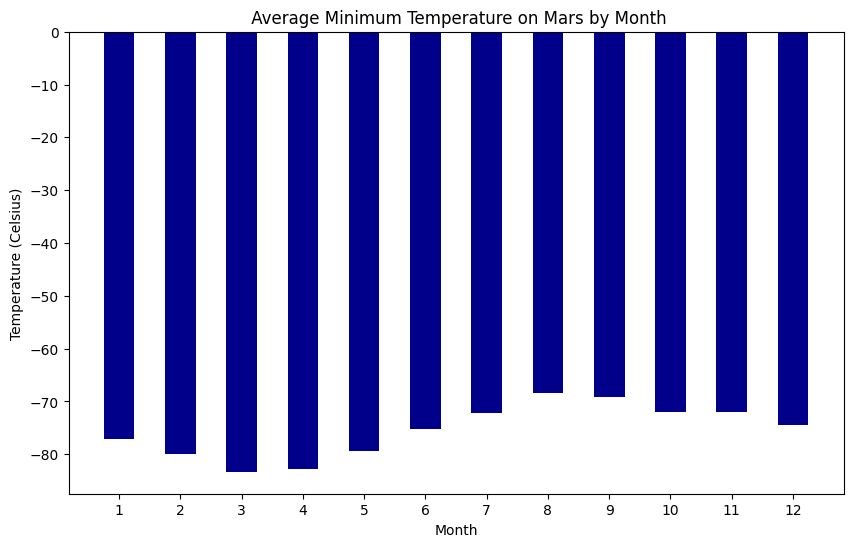

In [16]:
# Plot the average temperature by month

# Define the data for the plot
months = average_min_temp_by_month.index
average_temperatures = average_min_temp_by_month.values

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, average_temperatures, color='darkblue',  width=0.5)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.title(' Average Minimum Temperature on Mars by Month')

# Set x-ticks to show every 1 month
plt.xticks(months)


# Show the plot
plt.show()

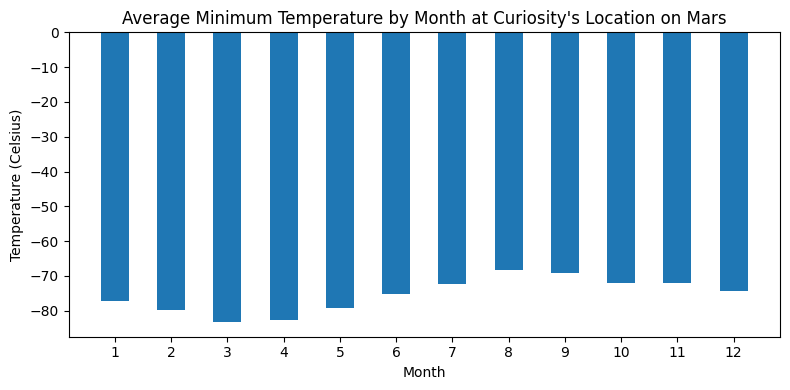

In [17]:
# Identify the coldest and hottest months in Curiosity's location

# Calculate the average minimum temperature by month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Create a DataFrame for the average minimum temperature by month
temp_data = pd.DataFrame({'month': average_min_temp_by_month.index, 'average_min_temp': average_min_temp_by_month})

# Sort the data by average minimum temperature in descending order
temp_data = temp_data.sort_values(by='average_min_temp', ascending=False)

# Convert 'month' to a categorical variable with sorted order
temp_data['month'] = pd.Categorical(temp_data['month'], categories=temp_data['month'], ordered=True)

# Plot the data as a bar chart
plt.figure(figsize=(8, 4))
plt.bar(temp_data['month'], temp_data['average_min_temp'], width=0.5)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.title('Average Minimum Temperature by Month at Curiosity\'s Location on Mars')

# Set x-ticks to show every 1 month
plt.xticks(months)

# Show the plot

plt.tight_layout()
plt.show() 







In [18]:
# 4. Average pressure by Martian month
# Calculate the average atmospheric pressure by Martian month
average_pressure_by_martian_month = df.groupby('month')['pressure'].mean()

print (average_pressure_by_martian_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


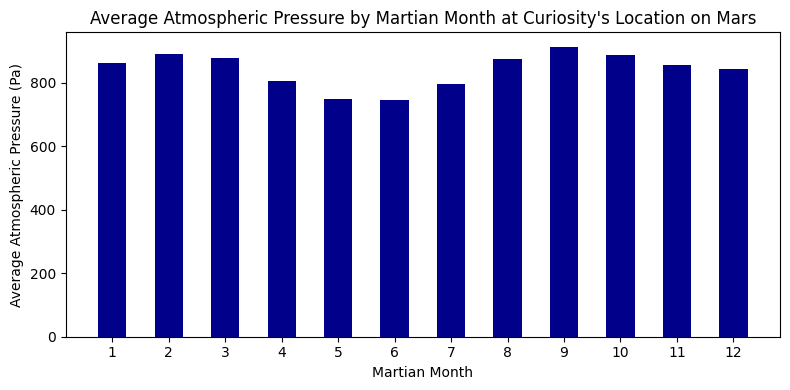

In [19]:
# Plot the average pressure by month
# Create a DataFrame for the average atmospheric pressure by Martian month
pressure_data_martian_month = pd.DataFrame({'Martian Month': average_pressure_by_martian_month.index, 'Average Pressure': average_pressure_by_martian_month})

# Sort the data by Martian month
pressure_data_martian_month = pressure_data_martian_month.sort_values(by='Martian Month')

# Plot the data as a bar chart
plt.figure(figsize=(8, 4))
plt.bar(pressure_data_martian_month['Martian Month'], pressure_data_martian_month['Average Pressure'], color='darkblue', width=0.5)

# Add labels and title
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Martian Month at Curiosity\'s Location on Mars')

# Set x-ticks to show every 1 month
plt.xticks(months)

# Show the plot
plt.tight_layout()
plt.show()

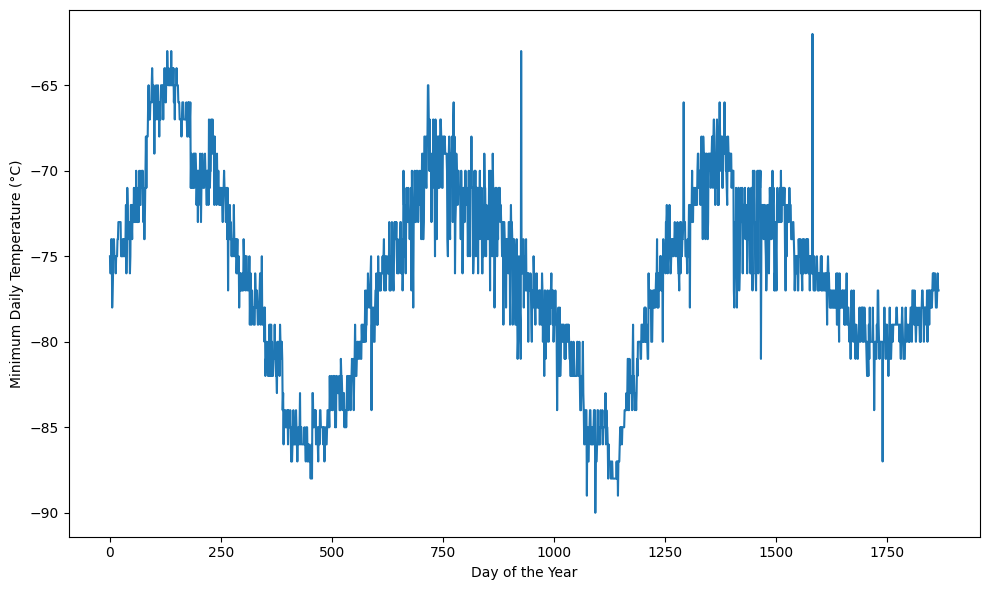

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Extract the day of the year (ordinal day) from the 'terrestrial_date' column
df['day_of_year'] = df['terrestrial_date'].dt.dayofyear

# Create a line graph for the variation in minimum daily temperature
plt.figure(figsize=(10, 6))
df.min_temp.plot()

# Add labels and title
plt.xlabel('Day of the Year')
plt.ylabel('Minimum Daily Temperature (°C)')

# Show the plot
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV

# Export the DataFrame to a CSV file
df.to_csv('/Users/ifanira/Desktop/Assignment/Webscraping-challenge-11/mars_weather_data.csv', index=False)

# The 'index=False' parameter ensures that the DataFrame's index is not included in the CSV file.

In [22]:
browser.quit()